In [ ]:
import pandas as pd
import numpy as np
# To import the modules
from IPython.display import display
import matplotlib.pyplot as plt #for data visualization
import pandas as pd #For data related tasks
import numpy as np
from sklearn.linear_model import LinearRegression
import random
import yfinance as yf

In [ ]:
# To get the data
dict = pd.read_csv("AAPL.csv")

#dict=yf.download('AAPL', start='2020-11-01', end='2023-09-01')

data = pd.DataFrame(dict)

# To set the date column as an index
data = data.set_index('Date')

# To set the index into datetime
data = data.set_index(pd.DatetimeIndex(data.index.values))
data.head()

df = data
data = data.tail(120)

# To store the data
actual_price = data.tail(1)

# To get all the data except the last row
data = data.head(len(data)-1)

display(data)

,Open,High,Low,Close,Adj Close,Volume
2021-06-03,124.680000,124.849998,123.129997,123.540001,123.175415,76229200
2021-06-04,124.070000,126.160004,123.849998,125.889999,125.518478,75169300
2021-06-07,126.169998,126.320000,124.830002,125.900002,125.528450,71057600
2021-06-08,126.599998,128.460007,126.209999,126.739998,126.365967,74403800
2021-06-09,127.209999,127.750000,126.519997,127.129997,126.754814,56877900
...,...,...,...,...,...,...
2021-11-12,148.429993,150.399994,147.479996,149.990005,149.990005,63632600
2021-11-15,150.369995,151.880005,149.429993,150.000000,150.000000,59222800
2021-11-16,149.940002,151.490005,149.339996,151.000000,151.000000,59256200
2021-11-17,151.000000,155.000000,150.990005,153.490005,153.490005,88807000


# **To show the stock prices**

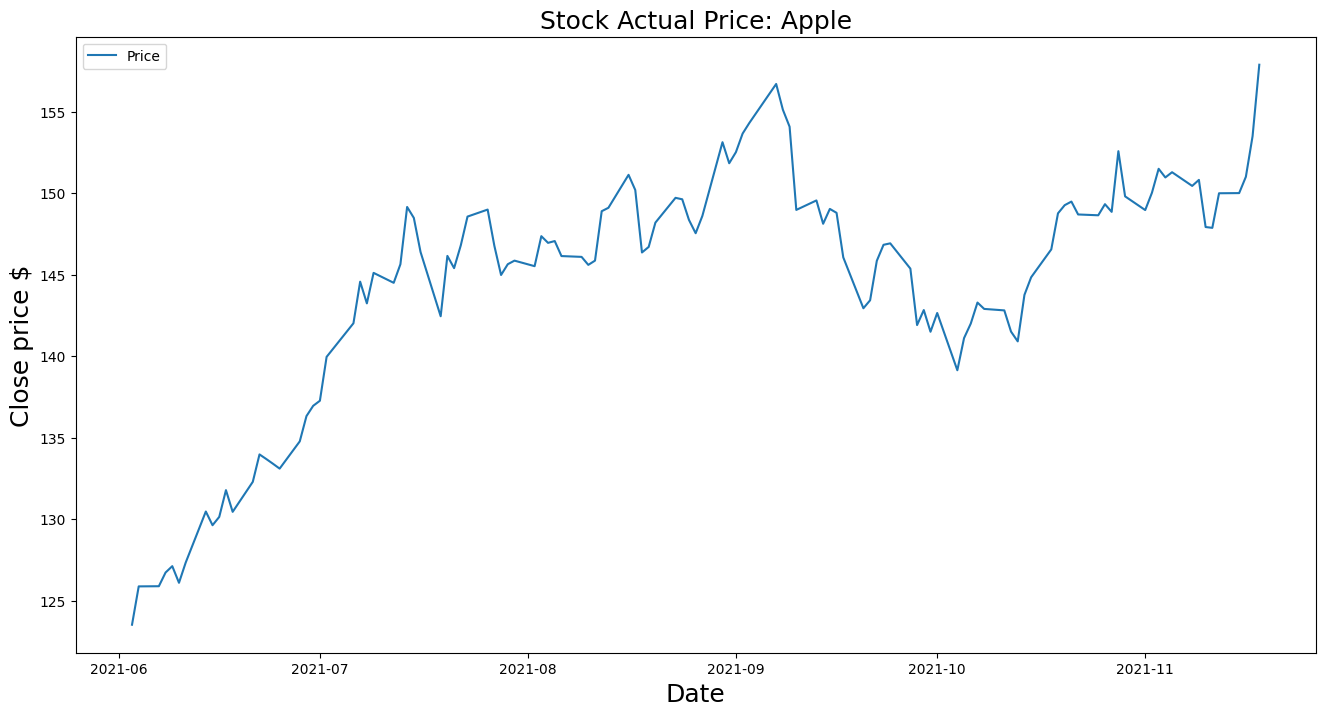

In [ ]:
plt.figure(figsize=(16,8))
# To display the price
plt.title('Stock Actual Price: Apple', fontsize=18)
plt.plot(data['Close'], label='Price')
plt.ylabel('Close price $', fontsize=18)
plt.xlabel('Date', fontsize=18)

# To give a legend
plt.legend()

# To display the graph
plt.show()

In [ ]:
# To create 20 days simple moving average column
data['SMA20'] = data['Close'].rolling(window=20, min_periods=1).mean()

# To create 20 days simple moving average column
data['SMA50'] = data['Close'].rolling(window=50, min_periods=1).mean()

# To create 20 days simple moving average column
data['SMA100'] = data['Close'].rolling(window=100, min_periods=1).mean()

# **To check NULL values**

In [ ]:
#To check NULL values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SMA20        0
SMA50        0
SMA100       0
dtype: int64

# **To see the correlations between the data**

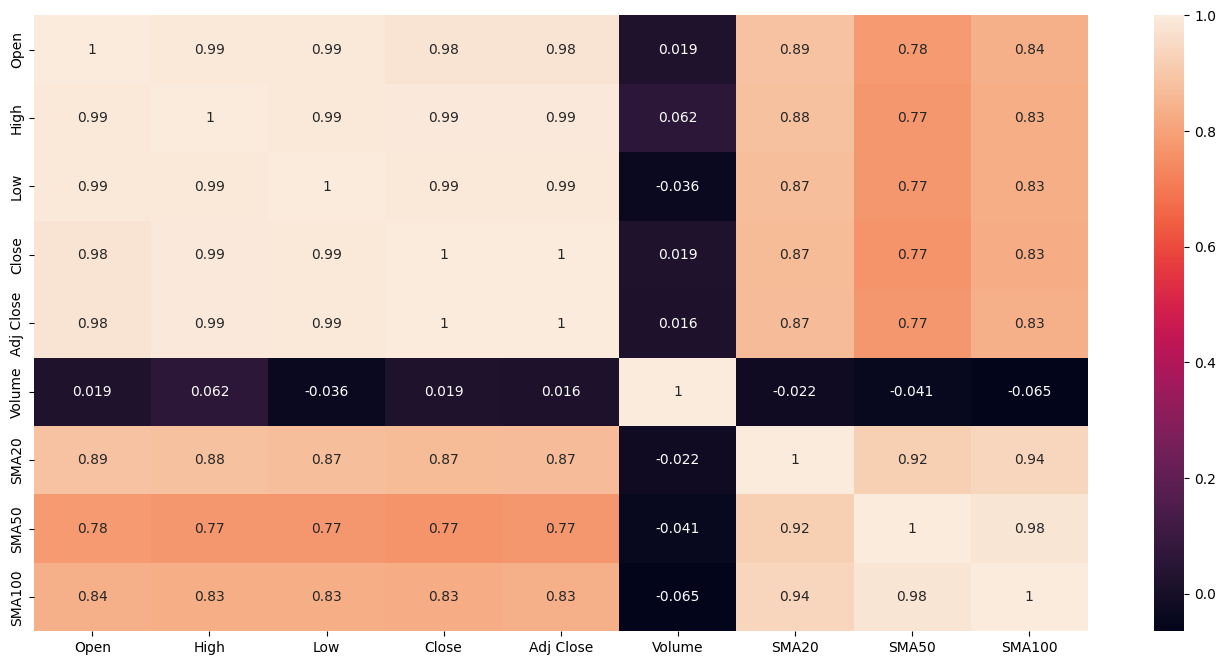

In [ ]:
#To see the correlations between the data
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['SMA20']]
y = data['Close']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

# Test set
print(X_test.describe())

# Training set
print(X_train.describe())

            SMA20
count   24.000000
mean   143.608867
std      6.859108
min    127.292998
25%    143.460249
50%    146.103000
75%    147.732250
max    150.659500
            SMA20
count   95.000000
mean   142.294063
std      8.291444
min    123.540001
25%    137.433751
50%    145.709499
75%    148.490500
max    150.809500


# **Linear Regression**

**Six months**

In [ ]:
print(len(data))
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
prediction = LR.predict(X_test)
print(LR.score(X_test,y_test))

119
0.5660095466388989


# **To measure the accuracy of the model**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))
print("Coefficient of Determination:", r2_score(y_test, prediction))

Mean Absolute Error: 2.9436125412509626
Coefficient of Determination: 0.5660095466388989


**One year**

In [ ]:
# To create 20 days simple moving average column
df['SMA20'] = df['Close'].rolling(window=20, min_periods=1).mean()

print(len(df))
from sklearn.model_selection import train_test_split

X = df[['SMA20']]
y = df['Close']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)


251


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
prediction = LR.predict(X_test)
print(LR.score(X_test,y_test))

0.7673826280330648


# **To measure the accuracy of the model**

---



In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))
print("Coefficient of Determination:", r2_score(y_test, prediction))

Mean Absolute Error: 4.186036427294237
Coefficient of Determination: 0.7673826280330648


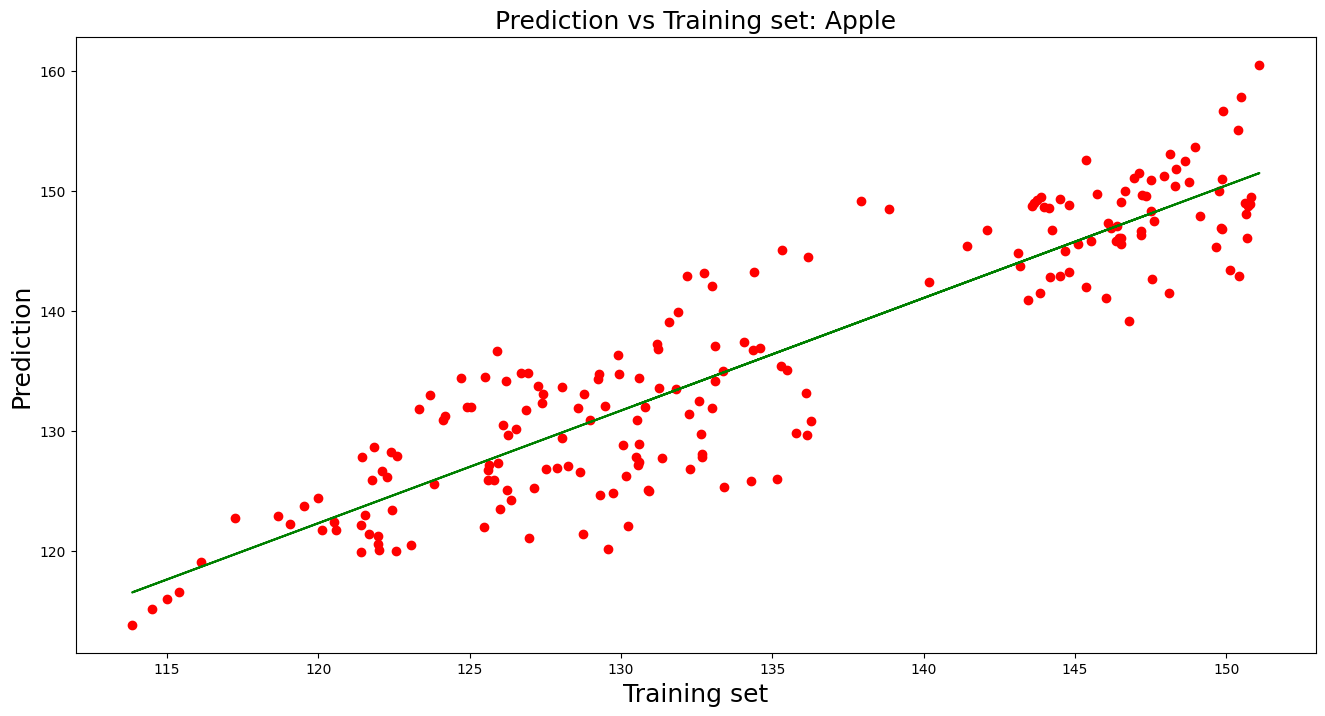

In [ ]:
# To display the graph
plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, LR.predict(X_train), color = "green")
plt.title("Prediction vs Training set: Apple", fontsize=18)
plt.xlabel("Training set", fontsize=18)
plt.ylabel("Prediction", fontsize=18)
plt.show()

# **Predicting  price in the future**

In [ ]:
# To get the data
dict = pd.read_csv("AAPL.csv")

#dict=yf.download('AAPL', start='2020-11-01', end='2023-09-01')
data = pd.DataFrame(dict)

# To set the date column as an index
data = data.set_index('Date')

# To set the index into datetime
data = data.set_index(pd.DatetimeIndex(data.index.values))
data.head()

data = data.tail(120)

data = data[['Close']]
# To create variable to predict 'X' days out into the feature
future_days = 50
data['Prediction'] = data[['Close']].shift(-future_days)

In [ ]:
# To create the feature data set (X) and convert it to a numpy array and remove the last the last 'X' days
X = np.array(data.drop(['Prediction'],1))[:-future_days]

# To create the target data set (y) and convert it to numpy array and get the target value except the last 'X' days
y = np.array(data['Prediction'])[:-future_days]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

<ipython-input-23-442c77a167cf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Prediction'],1))[:-future_days]


In [ ]:
# To Get the last 'X' rows of the feature data set
x_future = data.drop(['Prediction'],1)
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

<ipython-input-24-2b3bbb5cb32d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = data.drop(['Prediction'],1)


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
prediction = LR.predict(x_future)
print(LR.score(X_test,y_test))

-0.04339355542291412


<ipython-input-26-246bff49e7f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


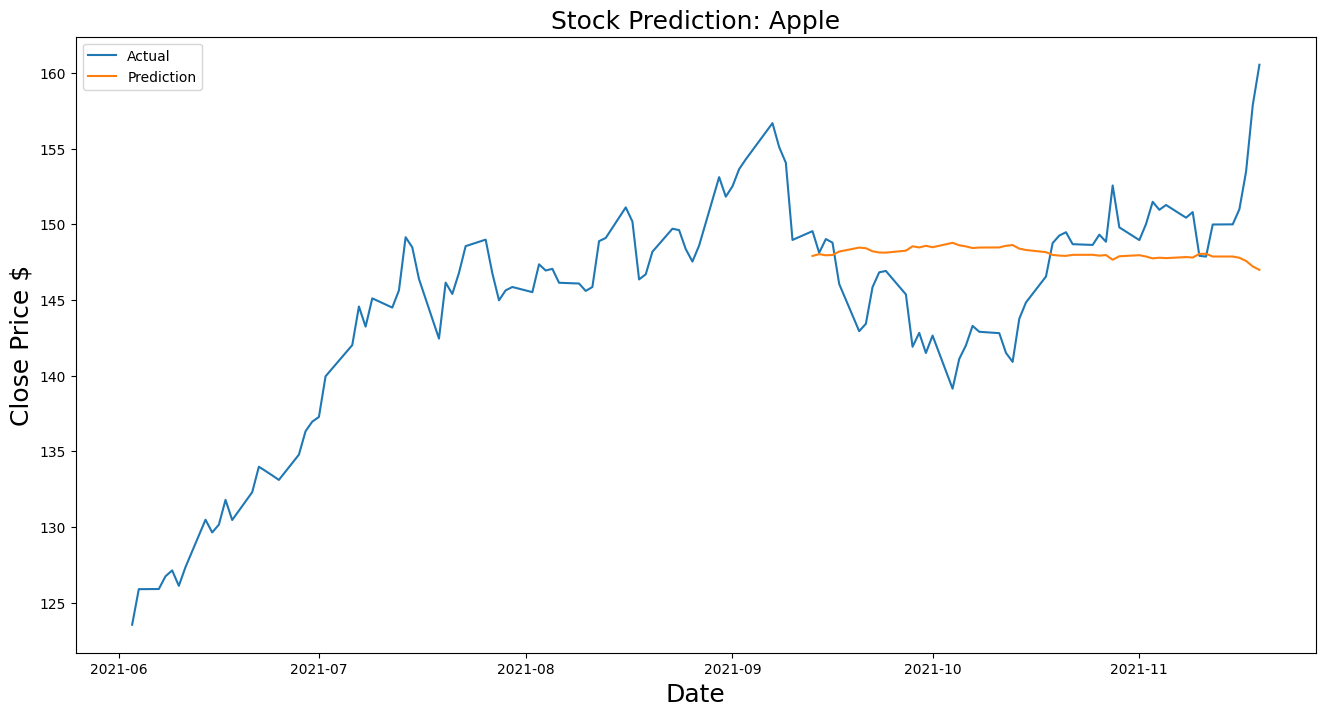

In [ ]:
Predictions = prediction
valid = data[X.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16, 8))
plt.ylabel('Close Price $', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.plot(data['Close'])
plt.plot(valid[['Prediction']])
plt.title('Stock Prediction: Apple', fontsize=18)
plt.legend(['Actual', 'Prediction'])
plt.show()

# **LASSO Linear Regression**

In [ ]:
data = data.reset_index()
x = np.array(data.index).reshape(-1, 1)
y = data['Close']
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x,y)
prediction = lasso.predict(x)
data["prediction"] = prediction
print(lasso.score(x,y))

0.46454157290668996


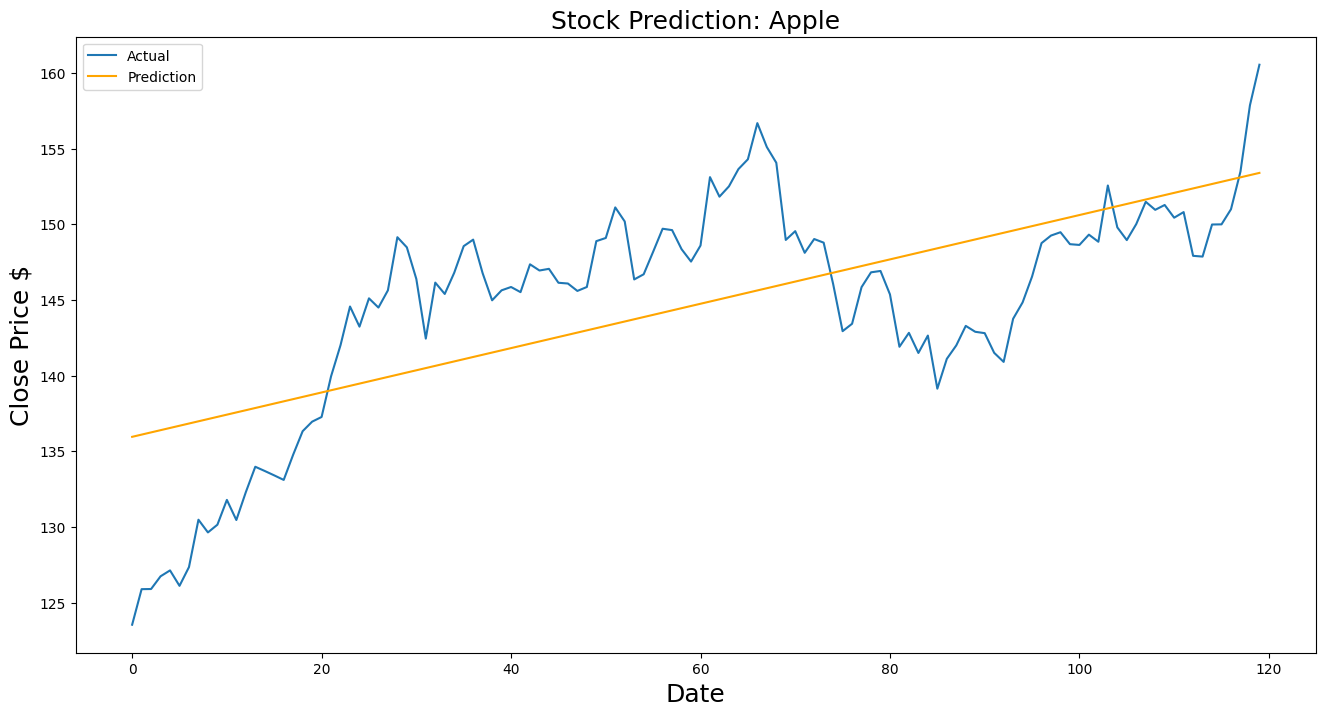

In [ ]:
# To display the graph
plt.figure(figsize=(16, 8))
plt.plot(data["Close"], label='Actual')
plt.plot(data.index, prediction,label='Prediction', color = 'orange')
plt.title('Stock Prediction: Apple', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.show()

# **Support vector machine (SVM)**

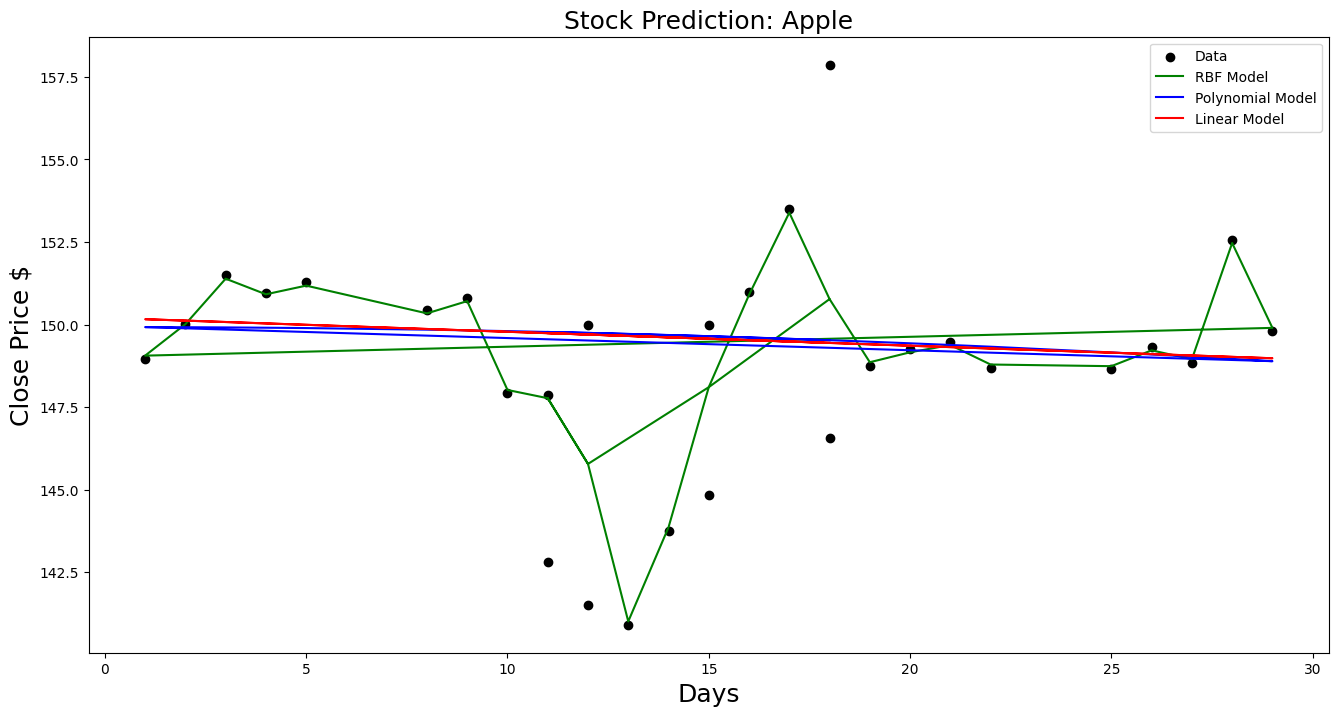

RBF Model [149.05949478]
Linear Model [150.16222672]
Polynmial Model [149.92361468]

 The actual price 250    160.550003
Name: Close, dtype: float64


In [ ]:
#Support vector machine (SVM)
from sklearn.svm import SVR

df = pd.read_csv("AAPL.csv")

#df=yf.download('AAPL', start='2020-11-01', end='2023-09-01')

#dict=yf.download('AAPL', start='2020-11-01', end='2023-09-01')
df = df.tail(30)

# To store the data
actual_price = df.tail(1)

#print(actual_price)
data = data.tail(30)

# To get all the data except the last row
df = df.head(len(df)-1)

# Get only the dates and the close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Close']


# Create empty lists
days = list()
adj_close_prices = list()


# To create an independent data set (dates)
for day in df_days:
    days.append([int(day.split('-')[2])])

# Create the dependent data set (Close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))


# To create three models
lin_svr = SVR(kernel='linear', C = 1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C = 1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C = 1000.0, gamma=0.85)
rbf_svr.fit(days, adj_close_prices)

# To show the three models
plt.figure(figsize=(16,8))
plt.title('Stock Prediction: Apple', fontsize=18)
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'blue', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'red', label = 'Linear Model')

plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.legend()
plt.show()

# To show the predicted price for a given day let's predict the last price which was in the last row
day = [[1]]
print('RBF Model', rbf_svr.predict(day))
print('Linear Model', lin_svr.predict(day))
print('Polynmial Model', poly_svr.predict(day))

# To show the actual price for that given day
print('\n The actual price', actual_price['Close'])


# **Buy and Sell signals**

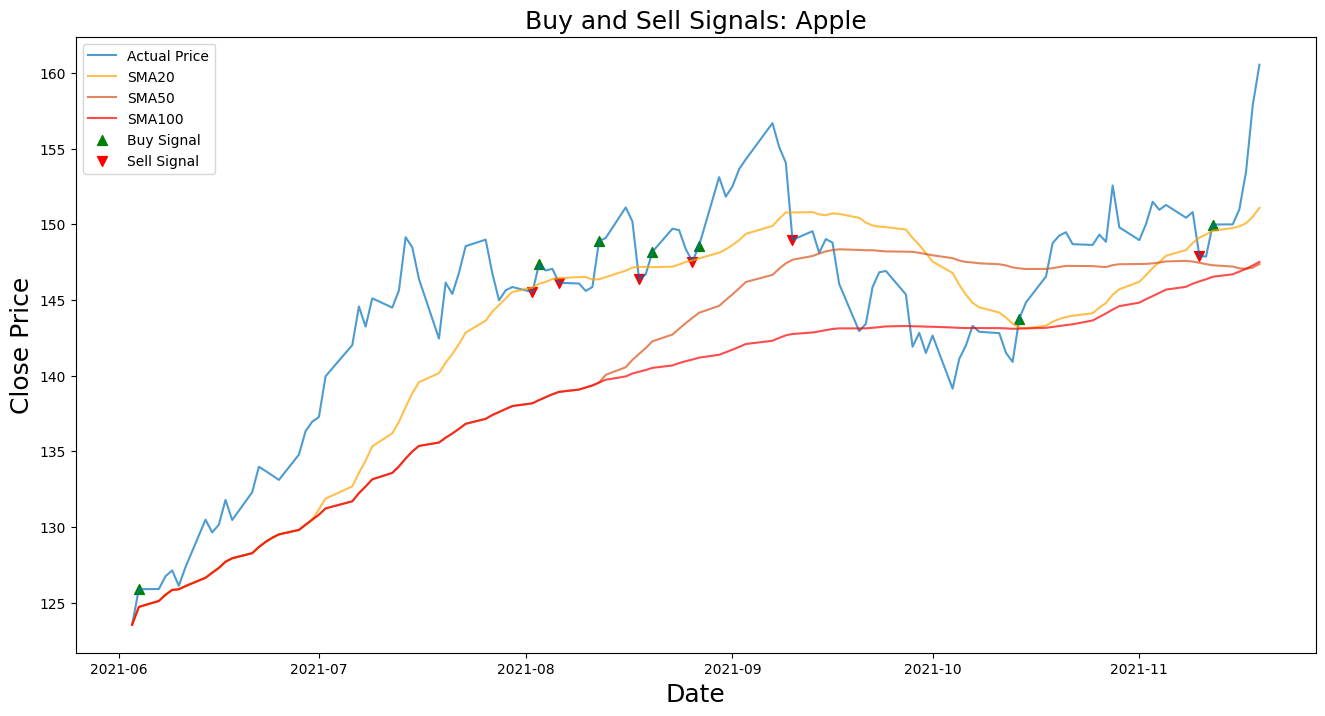

In [ ]:
#Buy and Sell signals

# To get the data
dict = pd.read_csv("AAPL.csv")
data = pd.DataFrame(dict)

# To set the date column as an index
data = data.set_index('Date')

# To set the index into datetime
data = data.set_index(pd.DatetimeIndex(data.index.values))
data.head()

data = data.tail(120)

# To create 20 days simple moving average column
data['SMA20'] = data['Close'].rolling(window=20, min_periods=1).mean()

# To create 20 days simple moving average column
data['SMA50'] = data['Close'].rolling(window=50, min_periods=1).mean()

# To create 20 days simple moving average column
data['SMA100'] = data['Close'].rolling(window=100, min_periods=1).mean()

# To Get buy and sell signals
data['Signal'] = np.where(data['Close'] > data['SMA20'], 1, 0)
data['Position'] = data['Signal'].diff()

data['Buy'] = np.where(data['Position'] == 1, data['Close'], np.NAN)
data['Sell'] = np.where(data['Position'] == -1, data['Close'], np.NAN)


# to visualize Buy and Sell Signals
plt.figure(figsize=(16,8))
plt.plot(data['Close'], alpha=.7, label='Actual Price', color='#0072BD')
plt.plot(data['SMA20'], alpha=0.7, label='SMA20', color='orange')
plt.plot(data['SMA50'], alpha=0.7, label='SMA50', color='#D95319')
plt.plot(data['SMA100'], alpha=0.7, label='SMA100', color='red')

# To make buy or sell signal
plt.scatter(data.index, data['Buy'], s = 50, label='Buy Signal', marker='^', color='green')
plt.scatter(data.index, data['Sell'], s = 50, label='Sell Signal', marker='v', color='red')

# To add text for the visualization
plt.title('Buy and Sell Signals: Apple', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xlabel('Date', fontsize=18)

# Give legend
plt.legend()

# Show the graph
plt.show()

In [ ]:
pip install pandas-datareader

In [ ]:
pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [ ]:
pip install --upgrade pandas-datareader

# **Correlation between companies**

In [ ]:
#Correlation between companies

#pip install pandas-datareader
#pip install --upgrade pandas
#pip install --upgrade pandas-datareader

import pandas_datareader as pdr
import datetime as dt
import numpy as np
import pandas_datareader.data as pdr

import yfinance as yf


tickers = ['AAPL', 'TWTR', 'IBM', 'MSFT','^GSPC', 'TLT']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)
data = data['Close']

data.rename(columns={'^GSPC':'SP500'}, inplace=True)

data.head()


from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
#y_symbols = ['AAPL', 'TWTR', 'IBM', 'MSFT','^GSPC', 'TLT']
tickers = ['AAPL', 'TWTR', 'IBM', 'MSFT','^GSPC', 'TLT']
from datetime import datetime
startdate = datetime(2020,1,1)
#enddate = datetime(2022,12,15)
#data = pdr.get_data_yahoo(y_symbols, start=startdate)
data = pdr.get_data_yahoo(tickers, start=startdate)

TypeError: ignored

In [ ]:
# To normalize the data

log_returns = np.log(data/data.shift())

log_returns

Adj Close                                                  Close  \
                AAPL       IBM      MSFT       TLT TWTR     ^GSPC      AAPL   
Date                                                                          
2020-01-02       NaN       NaN       NaN       NaN  NaN       NaN       NaN   
2020-01-03 -0.009769 -0.008007 -0.012530  0.015283  NaN -0.007085 -0.009770   
2020-01-06  0.007937 -0.001788  0.002581 -0.005695  NaN  0.003527  0.007937   
2020-01-07 -0.004714  0.000671 -0.009159 -0.004928  NaN -0.002807 -0.004714   
2020-01-08  0.015958  0.008312  0.015803 -0.006633  NaN  0.004890  0.015958   
...              ...       ...       ...       ...  ...       ...       ...   
2023-09-13 -0.011926  0.001707  0.012848 -0.000212  NaN  0.001241 -0.011926   
2023-09-14  0.008744  0.005444  0.007825 -0.007244  NaN  0.008395  0.008744   
2023-09-15 -0.004163 -0.009273 -0.025356 -0.006113  NaN -0.012234 -0.004163   
2023-09-18  0.016772 -0.006184 -0.003519  0.005685  NaN  0.000721  0.016772   
2023-09-19  0.006162  0.009808 -0.001247 -0.007408  NaN -0.002153  0.006162   

                                          ...      Open                 \
                 IBM      MSFT       TLT  ...      MSFT       TLT TWTR   
Date                                      ...                            
2020-01-02       NaN       NaN       NaN  ...       NaN       NaN  NaN   
2020-01-03 -0.008007 -0.012530  0.015283  ... -0.002901  0.010761  NaN   
2020-01-06 -0.001788  0.002581 -0.005695  ... -0.007863  0.010217  NaN   
2020-01-07  0.000671 -0.009160 -0.004928  ...  0.014160 -0.010579  NaN   
2020-01-08  0.008312  0.015803 -0.006633  ... -0.002451 -0.002100  NaN   
...              ...       ...       ...  ...       ...       ...  ...   
2023-09-13  0.001707  0.012848 -0.000212  ... -0.013521  0.000319  NaN   
2023-09-14  0.005444  0.007825 -0.007244  ...  0.023388  0.000213  NaN   
2023-09-15 -0.009273 -0.025356 -0.006113  ... -0.006597 -0.005123  NaN   
2023-09-18 -0.006184 -0.003519  0.005685  ... -0.027442 -0.006548  NaN   
2023-09-19  0.009808 -0.001247 -0.007408  ... -0.004985  0.002474  NaN   

                        Volume                                               
               ^GSPC      AAPL       IBM      MSFT       TLT TWTR     ^GSPC  
Date                                                                         
2020-01-02       NaN       NaN       NaN       NaN       NaN  NaN       NaN  
2020-01-03 -0.005659  0.076988 -0.282508 -0.068887  0.113960  NaN  0.007134  
2020-01-06 -0.002734 -0.211855  0.021588 -0.014429 -0.083990  NaN  0.060616  
2020-01-07  0.007527 -0.083788  0.242392  0.038659 -0.304970  NaN -0.074716  
2020-01-08 -0.001009  0.193229  0.340826  0.248839  0.236908  NaN  0.081279  
...              ...       ...       ...       ...       ...  ...       ...  
2023-09-13 -0.002377 -0.069914 -0.528486 -0.059889  0.152393  NaN  0.026904  
2023-09-14  0.005615 -0.324837  0.035624  0.202946  0.175219  NaN  0.033240  
2023-09-15  0.002270  0.584064  0.827830  0.619788 -0.081029  NaN  0.641805  
2023-09-18 -0.011819 -0.484698 -0.910076 -0.805369 -0.355692  NaN -0.785220  
2023-09-19  0.000063 -0.261727  0.453025 -0.019695  0.328209  NaN  0.134097  

[935 rows x 36 columns]

In [ ]:
log_returns.corr()

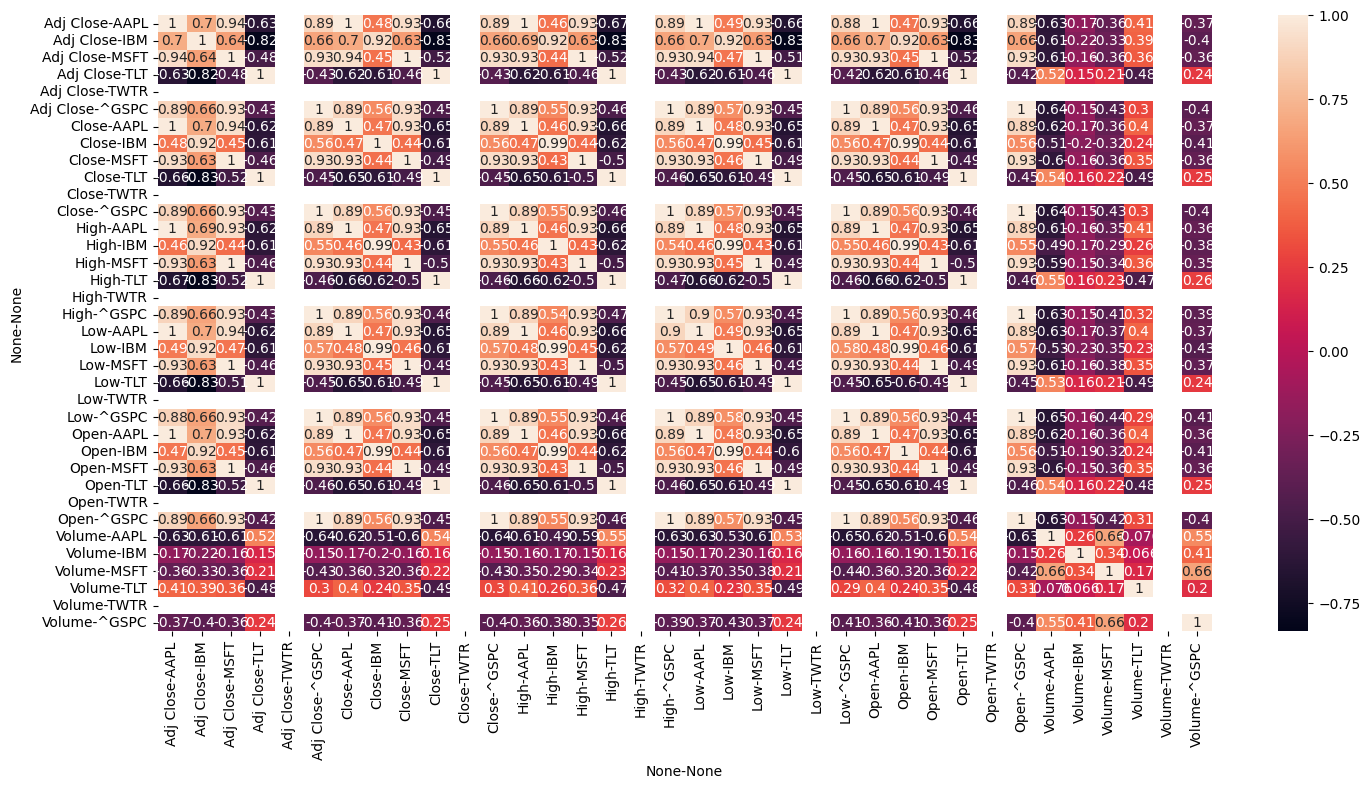

In [ ]:
# To display the matrix
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [ ]:
# To display the graph
plt.figure(figsize=(16, 8))
plt.plot(data['AAPL'] , label='AAPL')
plt.plot(data['TLT'] ,label='TLT (BOND)', color = 'orange')
plt.title('The correlation between Apple and TLT', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.show()

# **Naive Trading**

[*********************100%%**********************]  1 of 1 completed
            orders
2023-06-22       0
2023-06-23       0
2023-06-26      -1
2023-06-27       0
2023-06-28       1
2023-06-29       0
2023-06-30       0
2023-07-03       0
2023-07-05       0
2023-07-06       0
2023-07-07       0
2023-07-10       0
2023-07-11       0
2023-07-12       0
2023-07-13       0
2023-07-14       0
2023-07-17       0
2023-07-18       0
2023-07-19       0
2023-07-20       0
2023-07-21       0
2023-07-24       0
2023-07-25       0
2023-07-26       0
2023-07-27       0
2023-07-28       0
2023-07-31       0
2023-08-01       0
2023-08-02       0
2023-08-03       0
2023-08-04       0
2023-08-07      -1
2023-08-08       0
2023-08-09       0
2023-08-10       0
2023-08-11       0
2023-08-14       0
2023-08-15       0
2023-08-16       0
2023-08-17       0
2023-08-18       0
2023-08-21       0
2023-08-22       0
2023-08-23       0
2023-08-24       0
2023-08-25       0
2023-08-28       0
2023-08-29       0


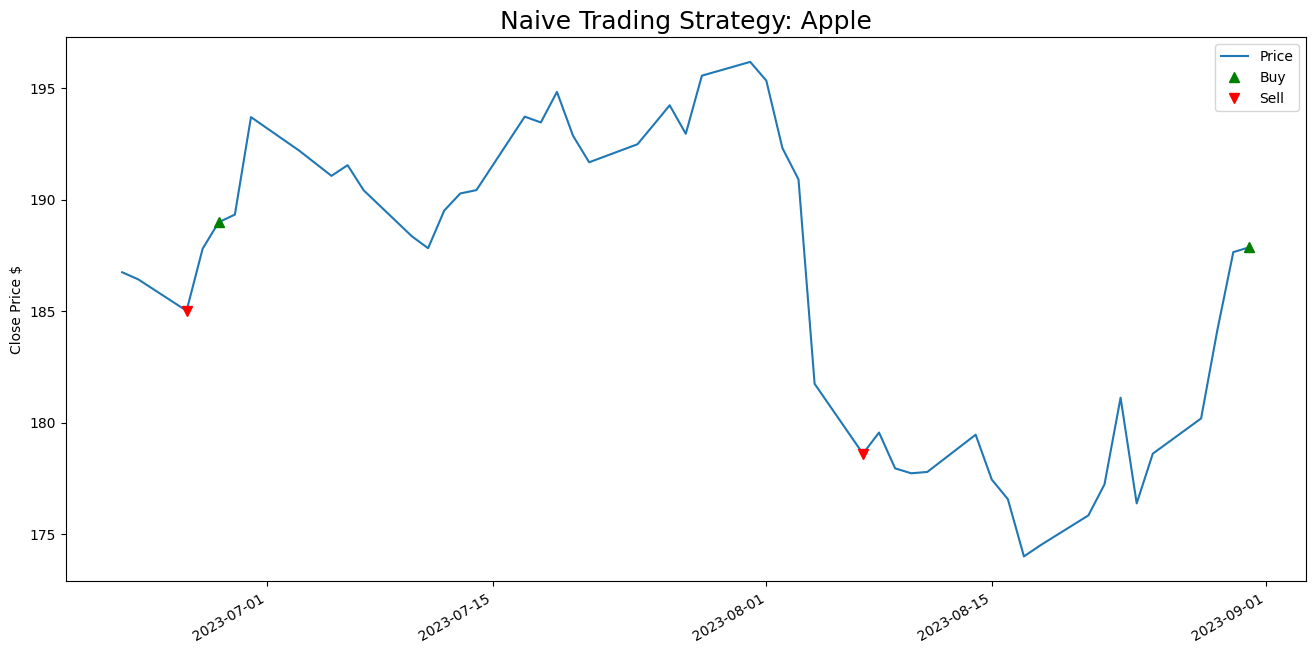

In [ ]:
#Naive Trading
#To get the data
import pandas as pd
import numpy as np
# To import the modules
from IPython.display import display
import matplotlib.pyplot as plt #for data visualization
import pandas as pd #For data related tasks
import numpy as np
from sklearn.linear_model import LinearRegression
import random
import yfinance as yf
dict=yf.download('AAPL', start='2020-11-01', end='2023-09-01')

#dict = pd.read_csv("AAPL.csv")
data = pd.DataFrame(dict)

# To set the date column as an index
#data = data.set_index('Date')

data = data.tail(50)

# To set the index into datetime
data = data.set_index(pd.DatetimeIndex(data.index.values))
data.head()

def naive_momentum_trading(financial_data, nb_conseq_days):
    signals = pd.DataFrame(index=financial_data.index)
    signals['orders'] = 0
    cons_day=0
    prior_price=0
    init=True
    for k in range(len(financial_data['Close'])):
        price=financial_data['Close'][k]
        if init:
            prior_price=price
            init=False
        elif price>prior_price:
            if cons_day<0:
                cons_day=0
            cons_day+=1
        elif price<prior_price:
            if cons_day>0:
                cons_day=0
            cons_day-=1
        if cons_day==nb_conseq_days:
            signals['orders'][k]=1
        elif cons_day == -nb_conseq_days:
            signals['orders'][k]=-1

    return signals

ts=naive_momentum_trading(data, 2)

print(ts)

# To disply the graph
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(111, ylabel='Close Price $')

data["Close"].plot(ax=ax1)

ax1.plot(ts.loc[ts.orders== 1.0].index, data["Close"][ts.orders == 1],'^', markersize=7, color='green')

ax1.plot(ts.loc[ts.orders== -1.0].index, data["Close"][ts.orders == -1],'v', markersize=7, color='red')

plt.legend(["Price","Buy","Sell"])
plt.title("Naive Trading Strategy: Apple", fontsize=18)

plt.show()